#### 逻辑回归

#### 1. 逻辑回归的原理
逻辑回归是一种分类算法，它的基本原理是通过一个线性函数和一个非线性函数的组合来进行分类。   
逻辑回归的模型表达式如下：   
线性函数：**$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$**   
非线性函数：$h = \frac{1}{1 + e^{-z}}$   
逻辑回归的目标是找到一组参数$w$和$b$，使得$h$尽可能的接近于真实的标签值$y$。   
逻辑回归的损失函数是交叉熵损失函数，表达式如下：   
$L(w, b) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(h^{(i)}) + (1 - y^{(i)})\log(1 - h^{(i)})$   
逻辑回归的目标是找到一组参数$w$和$b$，使得$L(w, b)$尽可能的小。   
       


### 2.经典二分类算法     
决策边界可以是直线、曲线、平面、超平面等等。(非线性)   
逻辑回归是一个广义线性模型，它的假设函数是一个Sigmoid函数:   
$h_\theta(x) = g(z) = \frac{1}{1 + e^{-z}$    
其中，$z = \theta^Tx = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$    
$h_\theta(x)$的值代表了预测为1的概率，因此，$1 - h_\theta(x)$代表了预测为0的概率。    
逻辑回归的损失函数是交叉熵损失函数:     
$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))]$     
逻辑回归的目标是找到一组参数$\theta$，使得$J(\theta)$尽可能的小。  




预测函数：$h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}$    
其中，   
$\theta = [\theta_0, \theta_1, \theta_2, ..., \theta_n] = \sum_{i=0}^{n}\theta_ix_i = \theta^Tx = y$    

分类任务:   
二分类：$y \in \{0, 1\}$    
$P(y = 1|x;\theta) = h_\theta(x)$    
$P(y = 0|x;\theta) = 1 - h_\theta(x)$   
整合：$P(y|x;\theta) = (h_\theta(x))^y(1 - h_\theta(x))^{1 - y}$   




似然函数：   
$L(\theta) = \prod_{i=1}^{m}P(y^{(i)}|x^{(i)};\theta) = \prod_{i=1}^{m}(h_\theta(x^{(i)}))^{y^{(i)}}(1 - h_\theta(x^{(i)}))^{1 - y^{(i)}}$   
对数似然函数：   
$l(\theta) = \log L(\theta) = \sum_{i=1}^{m}y^{(i)}\log(h_\theta(x^{(i)})) + (1 - y^{(i)})\log(1 - h_\theta(x^{(i)}))$    
此时需要求最大值, 但是求解最大值比较困难，所以一般会转化求下降值, 所以要加入负号。   
求导得:   
$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y_i-g(\theta^Tx_i)]x_i$     
参数更新：
$\theta_j = \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}[g(\theta^Tx_i) - y_i]x_i$    




### 非常好用! 泛用性强!

In [7]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')


#### Sigmoid函数：$g(z) = \frac{1}{1 + e^{-z}}$

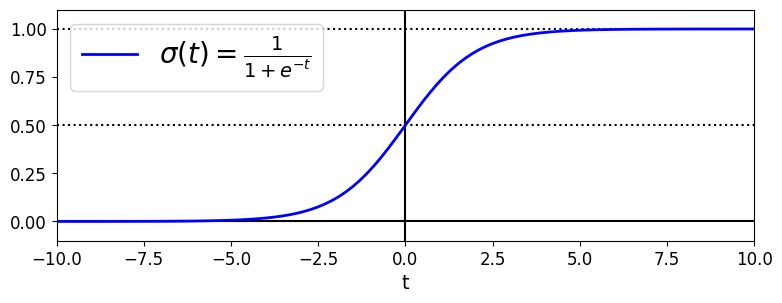

In [8]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()


鸢尾花数据集

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

对于传统的逻辑回归，我们要对标签做变换，将当前要做的数据作为正样本，其余的作为负样本。

In [14]:
X = iris.data[:, 3:]  # petal width
y = (iris['target'] == 2).astype(np.int64)  # 1 if Iris-Virginica, else 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

随着输入特征数值变化, 模型预测的概率变化

Text([1.68066066], 0.15, 'Decision  boundary')

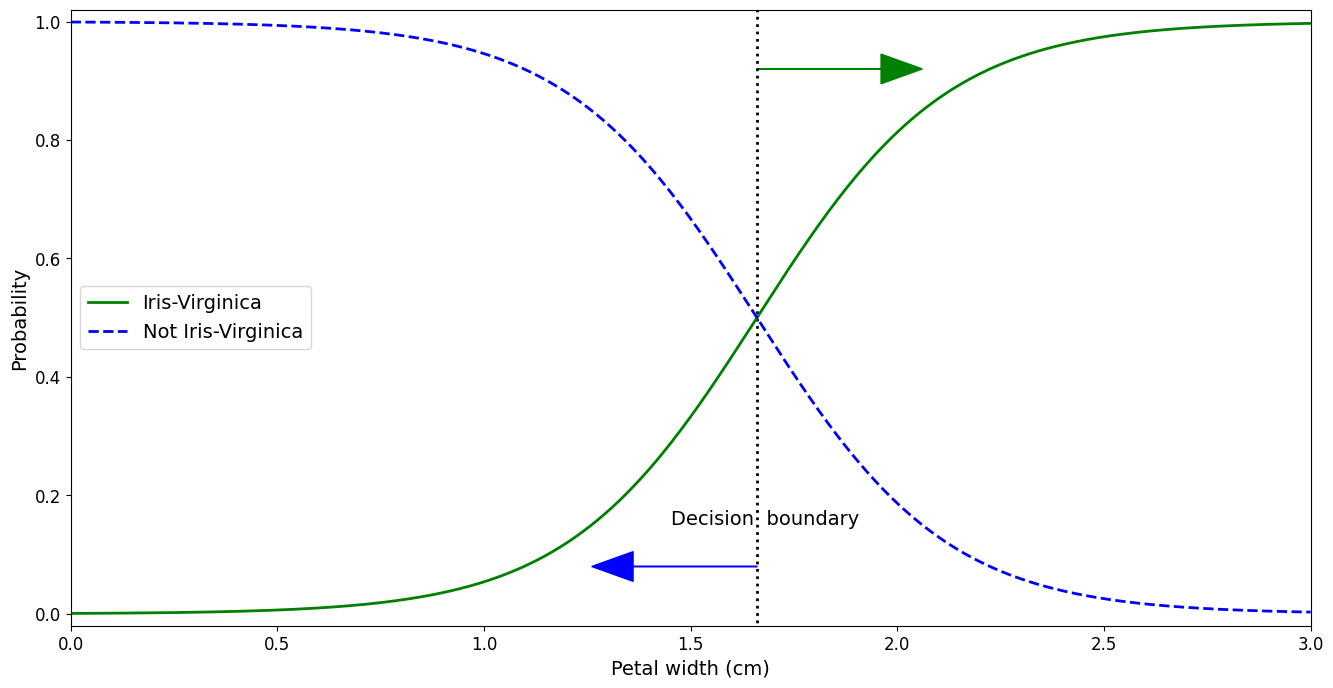

In [38]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(16, 8))
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis((0, 3, -0.02, 1.02))
plt.text(decision_boundary + 0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")


In [40]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)  # Iris-Virginica


In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

### 决策边界绘制   
- 构建坐标数据,在合理范围内生成坐标数据
- 整合坐标点
- 预测坐标点的概率
- 绘制决策边界

构建坐标数据

In [45]:
x0,x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1,1), np.linspace(0.8, 2.7, 200).reshape(-1,1))
X_new_test = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new_test)

Text(6.5, 2.3, 'Iris-Virginica')

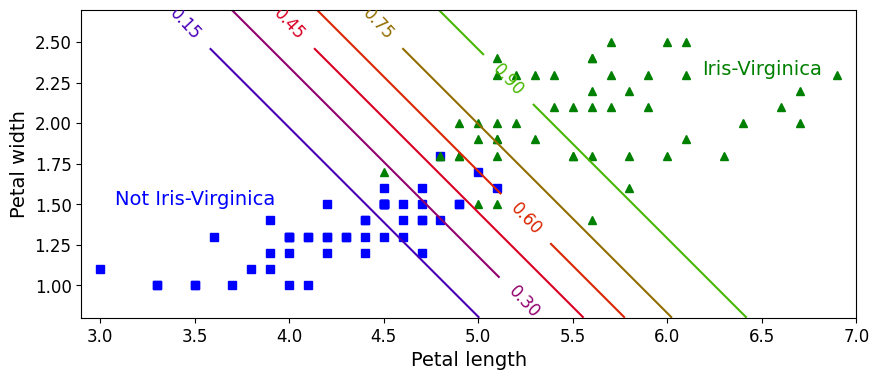

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0,0],X[y==0,1],"bs")
plt.plot(X[y==1,0],X[y==1,1],"g^")
zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz,cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis((2.9, 7, 0.8, 2.7))
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")


### 多分类,Softmax回归

softmax回归的原理:   
Softmax计算概率:   
$P(y = k|x) = \frac{e^{\theta_k^Tx}}{\sum_{j=1}^{K}e^{\theta_j^Tx}}$   
   
损失函数:    
$J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}1\{y^{(i)} = k\}\log\left(\frac{e^{\theta_k^Tx^{(i)}}}{\sum_{j=1}^{K}e^{\theta_j^Tx^{(i)}}}\right)$   

In [59]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]


In [60]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)


LogisticRegression(C=10, multi_class='multinomial')

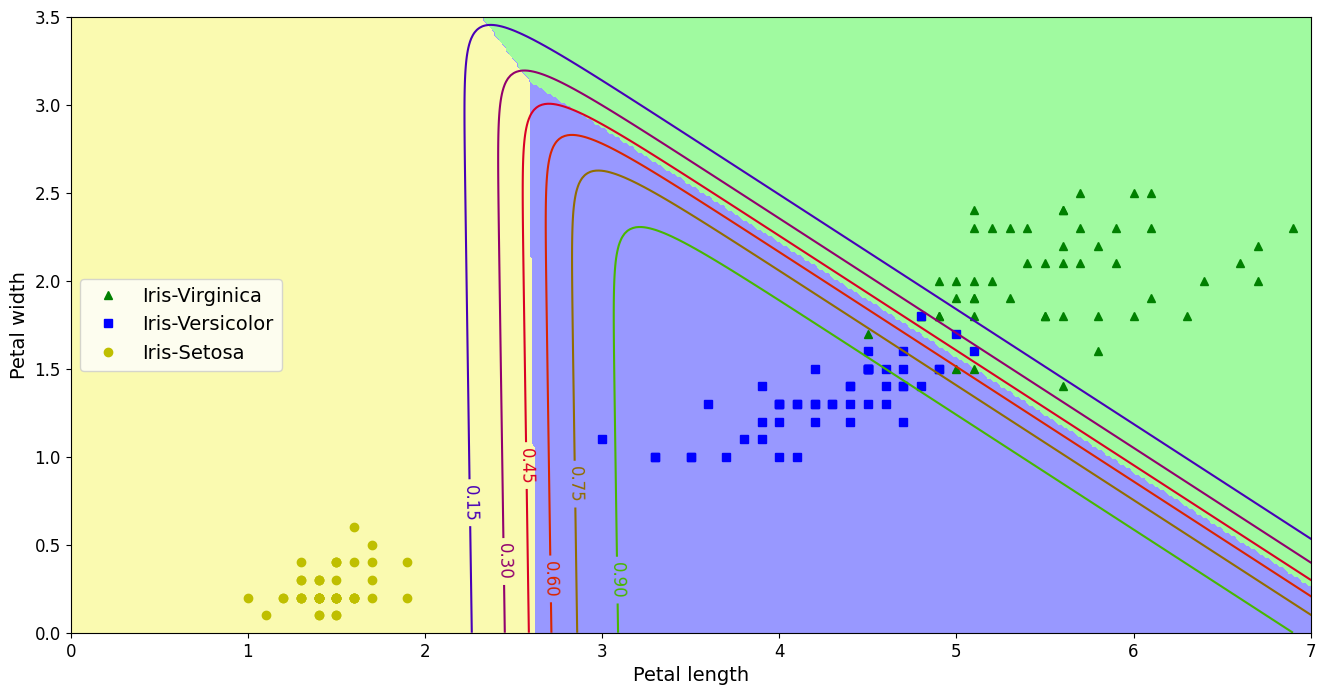

In [65]:
x0,x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1,1),
    np.linspace(0, 3.5, 200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(16, 8))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()